# Importing MELTS tbl files
- This notebook shows how to import liquid outputs from MELTS for models you have already run, and calculate the SCSS
- If you are interested in using MELTS more, please see the "Integration" example which allows you to run MELTS models and perform SCSS calculations in a single jupyter notebook

## If you havent done so already, you need to pip install PySulfSat
- Do this by removing the #. You only need to do this once per computer. After your initial installation, you will want to upgrade instead using the second command


In [1]:
#!pip install PySulfSat
#!pip install PySulfSat --upgrade

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
pd.options.display.max_columns = None
ss.__version__

'0.0.5dev'

In [3]:
df_out=ss.import_data('melts-liquid.tbl', MELTS=True)
df_out.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Index,T (C),P (kbars),log(10) f O2,liq mass (gm),liq rho (gm/cc),Fe2O3_Liq,Cr2O3_Liq,FeO_Liq,NiO_Liq,CoO,CO2,SO3,Cl2O-1,F2O-1,liq G (kJ),liq H (kJ),liq S (J/K),liq V (cc),liq Cp (J/K),activity SiO2,activity TiO2,activity Al2O3,activity Fe2O3,activity MgCr2O4,activity Fe2SiO4,activity MnSi0.5O2,activity Mg2SiO4,activity NiSi0.5O2,activity CoSi0.5O2,activity CaSiO3,activity Na2SiO3,activity KAlSiO4,activity Ca3(PO4)2,activity CO2,activity SO3,activity Cl2O-1,activity F2O-1,activity H2O,liq vis (log 10 poise),sol mass (gm),sol rho (gm/cc),sol G (kJ),sol H (kJ),sol S (J/K),sol V (cc),sol Cp (J/K),sys G (kJ),sys H (kJ),sys S (J/K),sys V (cc),sys Cp (J/K),sys dVdT (cc/K),sys dVdP (cc/bar),sys alpha (1/K),sys beta (1/bar),liq dVdT (cc/K),liq dVdP (cc/bar),liq alpha (1/K),liq beta (1/bar),T_K,P_kbar
0,48.9395,1.7076,14.5468,11.562153,0.0,7.8134,11.4532,3.2432,0.0498,0.1426,0.3565,0.106109,0.0,0.0,1,1180.0,1.0,-9.448,55.896906,2.7049,1.3632,0.0490,10.3353,0.0,0.0,0.0,0.0,0.0,0.0,-889.125226,-670.934890,150.149906,20.665419,82.069460,0.405807,0.038712,0.010619,0.002097,0.002286,0.080498,0.576997,0.055631,1.430376,0.599800,0.127654,0.000239,0.000923,0.081268,0.708770,0.722384,0.722384,0.722384,0.003026,2.2104,44.103094,2.8565,-741.707841,-587.118037,106.382551,15.439601,53.975711,-1630.833067,-1258.052927,256.532457,36.105020,136.045171,0.001998,-0.000133,0.000055,0.000004,0.001529,-0.000114,0.000074,0.000006,1453.15,1.0
1,48.9395,1.7076,14.5468,11.562153,0.0,7.8134,11.4532,3.2432,0.0498,0.1426,0.3565,0.106109,0.0,0.0,2,1180.0,1.0,-9.448,55.896906,2.7049,1.3632,0.0490,10.3353,0.0,0.0,0.0,0.0,0.0,0.0,-889.125226,-670.934890,150.149906,20.665419,82.069460,0.405807,0.038712,0.010619,0.002097,0.002286,0.080498,0.576997,0.055631,1.430376,0.599800,0.127654,0.000239,0.000923,0.081268,0.708770,0.722384,0.722384,0.722384,0.003026,2.2104,44.103094,2.8565,-741.707841,-587.118037,106.382551,15.439601,53.975711,-1630.833067,-1258.052927,256.532457,36.105020,136.045171,0.001998,-0.000133,0.000055,0.000004,0.001529,-0.000114,0.000074,0.000006,1453.15,1.0
2,48.9395,1.7076,14.5468,11.562153,0.0,7.8134,11.4532,3.2432,0.0498,0.1426,0.3565,0.106109,0.0,0.0,3,1180.0,1.0,-9.448,55.896906,2.7049,1.3632,0.0490,10.3353,0.0,0.0,0.0,0.0,0.0,0.0,-889.125226,-670.934890,150.149906,20.665419,82.069460,0.405807,0.038712,0.010619,0.002097,0.002286,0.080498,0.576997,0.055631,1.430376,0.599800,0.127654,0.000239,0.000923,0.081268,0.708770,0.722384,0.722384,0.722384,0.003026,2.2104,44.103094,2.8565,-741.707841,-587.118037,106.382551,15.439601,53.975711,-1630.833067,-1258.052927,256.532457,36.105020,136.045171,0.001998,-0.000133,0.000055,0.000004,0.001529,-0.000114,0.000074,0.000006,1453.15,1.0
3,50.8353,2.0476,15.4702,7.875019,0.0,7.8919,11.3077,3.6987,0.0615,0.1784,0.4459,0.174339,0.0,0.0,4,1180.0,1.0,-8.319,44.686234,2.6387,1.5255,0.0351,6.5021,0.0,0.0,0.0,0.0,0.0,0.0,-729.691232,-553.768074,121.063316,16.934974,66.123105,0.408704,0.049839,0.010763,0.003345,0.002017,0.051490,0.612639,0.060601,1.607300,0.669707,0.123438,0.000244,0.000918,0.093562,0.761409,0.730981,0.730981,0.730981,0.004260,2.4458,155.313766,3.1037,-2539.546999,-1994.001576,375.422650,50.041172,193.525898,-3269.238231,-2547.769650,496.485966,66.976146,259.649003,0.003297,-0.000143,0.000049,0.000002,0.001234,-0.000097,0.000073,0.000006,1453.15,1.0
4,47.0739,2.1197,16.5263,13.655123,0.0,6.4283,8.8927,4.2407,0.0776,0.2397,0.5994,0.088679,0.0,0.0,5,1180.0,4.0,-9.395,33.248594,2.7463,1.3455,0.0119,12.4442,0.0,0.0,0.0,0.0,0.0,0.0,-519.502831,-388.524460,90.134103,12.106775,48.371558,0.379223,0.060544,0.013647,0.001527,0.000467,0.100219,0.545487,0.047987,1.479920,0.704750,0.094522,0.000247,0.001330,0.164303,0.687288,0.759876,0.759876,0.759876,0.008261,2.0688,66.751406,2.9567,-1100.722101,-868.021114,160.135559,22.576115,80.899907,-1620.224933,-1256.545574,250.269661,34.682890,129.27146

## Calculating SCSS with Smythe 2017 and fixed sulfide composition

In [4]:
Smythe_CalcSulf=ss.calculate_S2017_SCSS(df=df_out, T_K=df_out['T_K'], 
P_kbar=df_out['P_kbar'], Fe_FeNiCu_Sulf=0.65,
Fe3Fet_Liq=df_out['Fe3Fet_Liq'])

Smythe_CalcSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,Mn_wt_atom,Fe2_wt_atom,Fe3_wt_atom,Ca_wt_atom,Na_wt_atom,K_wt_atom,P_wt_atom,H_wt_atom,Si_XA_ideal,Ti_XA_ideal,Al_XA_ideal,Mg_XA_ideal,Fe2_XA_ideal,Ca_XA_ideal,Na_XA_ideal,K_XA_ideal,H_XA_ideal,Si*Fe_ideal,Si_XA_non_ideal,Ti_XA_non_ideal,Al_XA_non_ideal,Mg_XA_non_ideal,Fe2_XA_non_ideal,Ca_XA_non_ideal,Na_XA_non_ideal,K_XA_non_ideal,H_XA_non_ideal,Si*Fe_non_ideal,log_SCSS_ideal,Fe_FeNiCu_Sulf_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Index,T (C),P (kbars),log(10) f O2,liq mass (gm),liq rho (gm/cc),Fe2O3_Liq,Cr2O3_Liq,FeO_Liq,NiO_Liq,CoO,CO2,SO3,Cl2O-1,F2O-1,liq G (kJ),liq H (kJ),liq S (J/K),liq V (cc),liq Cp (J/K),activity SiO2,activity TiO2,activity Al2O3,activity Fe2O3,activity MgCr2O4,activity Fe2SiO4,activity MnSi0.5O2,activity Mg2SiO4,activity NiSi0.5O2,activity CoSi0.5O2,activity CaSiO3,activity Na2SiO3,activity KAlSiO4,activity Ca3(PO4)2,activity CO2,activity SO3,activity Cl2O-1,activity F2O-1,activity H2O,liq vis (log 10 poise),sol mass (gm),sol rho (gm/cc),sol G (kJ),sol H (kJ),sol S (J/K),sol V (cc),sol Cp (J/K),sys G (kJ),sys H (kJ),sys S (J/K),sys V (cc),sys Cp (J/K),sys dVdT (cc/K),sys dVdP (cc/bar),sys alpha (1/K),sys beta (1/bar),liq dVdT (cc/K),liq dVdP (cc/bar),liq alpha (1/K),liq beta (1/bar),T_K,P_kbar
0,1180.083129,322.363043,1453.15,1.0,0.65,0.106109,0.445689,0.011694,0.156133,0.106077,0.0,0.078713,0.009342,0.111753,0.057265,0.000579,0.001099,0.021656,-12283.648081,-131.217873,-2880.697448,-1481.866451,-2697.820544,-875.118099,-758.576749,-16.787217,-378.878598,4089.363437,-12477.695182,-125.306344,-2966.516361,-1539.447180,-2746.710717,-986.955956,-785.260232,-16.538086,-384.744100,4133.141251,7.07334,0.65,48.9395,1.7076,14.5468,11.562153,0.0,7.8134,11.4532,3.2432,0.0498,0.1426,0.3565,0.106109,0.0,0.0,1,1180.0,1.0,-9.448,55.896906,2.7049,1.3632,0.0490,10.3353,0.0,0.0,0.0,0.0,0.0,0.0,-889.125226,-670.934890,150.149906,20.665419,82.069460,0.405807,0.038712,0.010619,0.002097,0.002286,0.080498,0.576997,0.055631,1.430376,0.599800,0.127654,0.000239,0.000923,0.081268,0.708770,0.722384,0.722384,0.722384,0.003026,2.2104,44.103094,2.8565,-741.707841,-587.118037,106.382551,15.439601,53.975711,-1630.833067,-1258.052927,256.532457,36.105020,136.045171,0.001998,-0.000133,0.000055,0.000004,0.001529,-0.000114,0.000074,0.000006,1453.15,1.0
1,1180.083129,322.363043,1453.15,1.0,0.65,0.106109,0.445689,0.011694,0.156133,0.106077,0.0,0.078713,0.009342,0.111753,0.057265,0.000579,0.001099,0.021656,-12283.648081,-131.217873,-2880.697448,-1481.866451,-2697.820544,-875.118099,-758.576749,-16.787217,-378.878598,4089.363437,-12477.695182,-125.306344,-2966.516361,-1539.447180,-2746.710717,-986.955956,-785.260232,-16.538086,-384.744100,4133.141251,7.07334,0.65,48.9395,1.7076,14.5468,11.562153,0.0,7.8134,11.4532,3.2432,0.0498,0.1426,0.3565,0.106109,0.0,0.0,2,1180.0,1.0,-9.448,55.896906,2.7049,1.3632,0.0490,10.3353,0.0,0.0,0.0,0.0,0.0,0.0,-889.125226,-670.934890,150.149906,20.665419,82.069460,0.405807,0.038712,0.010619,0.002097,0.002286,0.080498,0.576997,0.055631,1.430376,0.599800,0.127654,0.000239,0.000923,0.081268,0.708770,0.722384,0.722384,0.722384,0.003026,2.2104,44.103094,2.8565,-741.707841,-587.118037,106.382551,15.439601,53.975711,-1630.833067,-1258.052927,256.532457,36.105020,136.045171,0.001998,-0.000133,0.000055,0.000004,0.001529,-0.000114,0.000074,0.000006,1453.15,1.0
2,1180.083129,322.363043,1453.15,1.0,0.65,0.106109,0.445689,0.011694,0.156133,0.106077,0.0,0.078713,0.009342,0.111753,0.057265,0.000579,0.001099,0.021656,-12283.648081,-131.217873,-2880.697448,-1481.866451,-2697.820544,-875.118099,-758.576749,-16.787217,-378.878598,4089.363437,-12477.695182,-125.306344,-2966.516361,-1539.447180,-2746.710717,-986.955956,-785.260232,-16.538086,-384.744100,4133.141251,7.07334,0.65,48.9395

Text(0.5, 0, 'FeO$_{T}$ Liq (Wt%)')

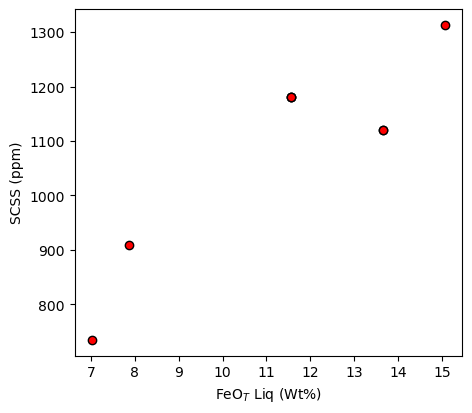

In [5]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4.5), sharey=True)
ax1.plot(Smythe_CalcSulf['FeOt_Liq'], Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'],
         'ok', mfc='red')

ax1.set_ylabel('SCSS (ppm)')
ax1.set_xlabel('FeO$_{T}$ Liq (Wt%)')

## Second MELTS file
- This one was kindly supplied by Lydia Harmon, its from the local MELTS version

In [6]:
df_out2=ss.import_data('melts-liquid_HarmonExample.tbl', MELTS=True)
df_out2.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Index,T (C),P (kbars),log(10) f O2,liq mass (gm),liq rho (gm/cc),Fe2O3_Liq,Cr2O3_Liq,FeO_Liq,NiO_Liq,CoO,CO2,SO3,Cl2O-1,F2O-1,liq G (kJ),liq H (kJ),liq S (J/K),liq V (cc),liq Cp (J/K),activity SiO2,activity TiO2,activity Al2O3,activity Fe2O3,activity MgCr2O4,activity Fe2SiO4,activity MnSi0.5O2,activity Mg2SiO4,activity NiSi0.5O2,activity CoSi0.5O2,activity CaSiO3,activity Na2SiO3,activity KAlSiO4,activity Ca3(PO4)2,activity CO2,activity SO3,activity Cl2O-1,activity F2O-1,activity H2O,liq vis (log 10 poise),sol mass (gm),sol rho (gm/cc),sol G (kJ),sol H (kJ),sol S (J/K),sol V (cc),sol Cp (J/K),sys G (kJ),sys H (kJ),sys S (J/K),sys V (cc),sys Cp (J/K),sys dVdT (cc/K),sys dVdP (cc/bar),sys alpha (1/K),sys beta (1/bar),liq dVdT (cc/K),liq dVdP (cc/bar),liq alpha (1/K),liq beta (1/bar),T_K,P_kbar
0,68.8282,0.5518,13.5613,3.181474,0.0,0.725,2.5639,3.7448,3.4309,0.0,3.3339,0.222373,0.0,0.0,1,1200.0,1.0,-7.227,103.163294,2.1740,0.7861,0.0,2.4740,0.0,0.0,0.0,0.0,0.0,0.0,-1773.476045,-1328.663310,301.946669,47.453132,142.097431,0.553617,0.032203,0.003857,0.004846,0.0,0.041888,0.0,0.008894,0.0,0.0,0.031910,0.000038,0.010466,0.0,0.0,0.0,0.0,0.0,0.092379,3.5247,6.560663,0.1450,-174.146344,-72.176310,69.221592,45.243659,19.572511,-1947.622389,-1400.839620,371.168261,92.696791,161.669942,0.043761,-0.044749,0.000472,0.000483,0.006093,-0.000836,0.000128,0.000018,1473.15,1.0
1,68.8277,0.5518,13.5612,3.181444,0.0,0.725,2.5639,3.7448,3.4309,0.0,3.3347,0.222460,0.0,0.0,2,1199.0,1.0,-7.238,103.164177,2.1742,0.7864,0.0,2.4737,0.0,0.0,0.0,0.0,0.0,0.0,-1773.197240,-1328.815508,301.859003,47.448509,142.096780,0.553587,0.032249,0.003850,0.004849,0.0,0.041918,0.0,0.008897,0.0,0.0,0.031911,0.000038,0.010456,0.0,0.0,0.0,0.0,0.0,0.092517,3.5298,6.559813,0.1451,-174.054588,-72.186535,69.199339,45.200130,19.571994,-1947.251828,-1401.002043,371.058343,92.648639,161.668774,0.043771,-0.044710,0.000472,0.000483,0.006093,-0.000836,0.000128,0.000018,1472.15,1.0
2,68.8271,0.5518,13.5611,3.181504,0.0,0.725,2.5638,3.7448,3.4308,0.0,3.3355,0.222569,0.0,0.0,3,1198.0,1.0,-7.249,103.165061,2.1745,0.7868,0.0,2.4734,0.0,0.0,0.0,0.0,0.0,0.0,-1772.918548,-1328.967724,301.771284,47.443887,142.096120,0.553556,0.032294,0.003842,0.004853,0.0,0.041948,0.0,0.008899,0.0,0.0,0.031912,0.000037,0.010445,0.0,0.0,0.0,0.0,0.0,0.092655,3.5349,6.558963,0.1452,-173.962832,-72.196744,69.177067,45.156588,19.571487,-1946.881380,-1401.164467,370.948351,92.600475,161.667608,0.043780,-0.044671,0.000473,0.000482,0.006093,-0.000836,0.000128,0.000018,1471.15,1.0
3,68.8265,0.5518,13.5610,3.181474,0.0,0.725,2.5638,3.7447,3.4308,0.0,3.3363,0.222656,0.0,0.0,4,1197.0,1.0,-7.261,103.165946,2.1747,0.7871,0.0,2.4731,0.0,0.0,0.0,0.0,0.0,0.0,-1772.639970,-1329.119957,301.683511,47.439267,142.095452,0.553525,0.032340,0.003835,0.004856,0.0,0.041979,0.0,0.008902,0.0,0.0,0.031913,0.000037,0.010434,0.0,0.0,0.0,0.0,0.0,0.092793,3.5400,6.558111,0.1454,-173.871074,-72.206936,69.154774,45.113032,19.570992,-1946.511044,-1401.326893,370.838285,92.552299,161.666444,0.043790,-0.044633,0.000473,0.000482,0.006093,-0.000836,0.000128,0.000018,1470.15,1.0
4,68.8259,0.5518,13.5609,3.181444,0.0,0.725,2.5638,3.7447,3.4308,0.0,3.3371,0.222743,0.0,0.0,5,1196.0,1.0,-7.272,103.166832,2.1749,0.7874,0.0,2.4728,0.0,0.0,0.0,0.0,0.0,0.0,-1772.361507,-1329.272209,301.595683,47.434647,142.094775,0.553494,0.032385,0.003828,0.004860,0.0,0.042009,0.0,0.008905,0.0,0.0,0.031914,0.000037,0.010424,0.0,0.0,0.0,0.0,0.0,0.092932,3.5451,6.557257,0.1455,-173.779314,-72.217111,69.132461,45.069463,19.570508,-1946.140821,-1401.489320,370.728144,92.504111,161.665283,0.043800,-0.044594,0.000473,0.000482,0.006093,-0.000836,0.000128,0.000018,1469.15,1.0


## Lets calculate the SCAS using Chowdhury & Dasgupta (2019)

In [8]:
CD_2019=ss.calculate_CD2019_SCAS(df=df_out2, T_K=df_out2['T_K']) 
CD_2019.head()

,Calc SCAS (ppm),lnXS,Xs,molesS,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Index,T (C),P (kbars),log(10) f O2,liq mass (gm),liq rho (gm/cc),Fe2O3_Liq,Cr2O3_Liq,FeO_Liq,NiO_Liq,CoO,CO2,SO3,Cl2O-1,F2O-1,liq G (kJ),liq H (kJ),liq S (J/K),liq V (cc),liq Cp (J/K),activity SiO2,activity TiO2,activity Al2O3,activity Fe2O3,activity MgCr2O4,activity Fe2SiO4,activity MnSi0.5O2,activity Mg2SiO4,activity NiSi0.5O2,activity CoSi0.5O2,activity CaSiO3,activity Na2SiO3,activity KAlSiO4,activity Ca3(PO4)2,activity CO2,activity SO3,activity Cl2O-1,activity F2O-1,activity H2O,liq vis (log 10 poise),sol mass (gm),sol rho (gm/cc),sol G (kJ),sol H (kJ),sol S (J/K),sol V (cc),sol Cp (J/K),sys G (kJ),sys H (kJ),sys S (J/K),sys V (cc),sys Cp (J/K),sys dVdT (cc/K),sys dVdP (cc/bar),sys alpha (1/K),sys beta (1/bar),liq dVdT (cc/K),liq dVdP (cc/bar),liq alpha (1/K),liq beta (1/bar),T_K,P_kbar,SiO2_Liq_mol_prop,MgO_Liq_mol_prop,MnO_Liq_mol_prop,FeOt_Liq_mol_prop,CaO_Liq_mol_prop,Al2O3_Liq_mol_prop,Na2O_Liq_mol_prop,K2O_Liq_mol_prop,TiO2_Liq_mol_prop,P2O5_Liq_mol_prop,H2O_Liq_mol_prop,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,H2O_Liq_mol_frac
0,438.366930,-7.112429,0.000815,0.001367,68.8282,0.5518,13.5613,3.181474,0.0,0.725,2.5639,3.7448,3.4309,0.0,3.3339,0.222373,0.0,0.0,1,1200.0,1.0,-7.227,103.163294,2.1740,0.7861,0.0,2.4740,0.0,0.0,0.0,0.0,0.0,0.0,-1773.476045,-1328.663310,301.946669,47.453132,142.097431,0.553617,0.032203,0.003857,0.004846,0.0,0.041888,0.0,0.008894,0.0,0.0,0.031910,0.000038,0.010466,0.0,0.0,0.0,0.0,0.0,0.092379,3.5247,6.560663,0.1450,-174.146344,-72.176310,69.221592,45.243659,19.572511,-1947.622389,-1400.839620,371.168261,92.696791,161.669942,0.043761,-0.044749,0.000472,0.000483,0.006093,-0.000836,0.000128,0.000018,1473.15,1.0,1.146430,0.018002,0.0,0.044316,0.045757,0.133110,0.060468,0.036452,0.006913,0.0,0.185363,0.683697,0.010736,0.0,0.026429,0.027288,0.079383,0.036061,0.021739,0.004123,0.0,0.110545
1,437.316747,-7.114845,0.000813,0.001364,68.8277,0.5518,13.5612,3.181444,0.0,0.725,2.5639,3.7448,3.4309,0.0,3.3347,0.222460,0.0,0.0,2,1199.0,1.0,-7.238,103.164177,2.1742,0.7864,0.0,2.4737,0.0,0.0,0.0,0.0,0.0,0.0,-1773.197240,-1328.815508,301.859003,47.448509,142.096780,0.553587,0.032249,0.003850,0.004849,0.0,0.041918,0.0,0.008897,0.0,0.0,0.031911,0.000038,0.010456,0.0,0.0,0.0,0.0,0.0,0.092517,3.5298,6.559813,0.1451,-174.054588,-72.186535,69.199339,45.200130,19.571994,-1947.251828,-1401.002043,371.058343,92.648639,161.668774,0.043771,-0.044710,0.000472,0.000483,0.006093,-0.000836,0.000128,0.000018,1472.15,1.0,1.146419,0.018002,0.0,0.044316,0.045757,0.133108,0.060468,0.036452,0.006913,0.0,0.185407,0.683677,0.010736,0.0,0.026428,0.027287,0.079380,0.036061,0.021738,0.004123,0.0,0.110569
2,436.274762,-7.117249,0.000811,0.001361,68.8271,0.5518,13.5611,3.181504,0.0,0.725,2.5638,3.7448,3.4308,0.0,3.3355,0.222569,0.0,0.0,3,1198.0,1.0,-7.249,103.165061,2.1745,0.7868,0.0,2.4734,0.0,0.0,0.0,0.0,0.0,0.0,-1772.918548,-1328.967724,301.771284,47.443887,142.096120,0.553556,0.032294,0.003842,0.004853,0.0,0.041948,0.0,0.008899,0.0,0.0,0.031912,0.000037,0.010445,0.0,0.0,0.0,0.0,0.0,0.092655,3.5349,6.558963,0.1452,-173.962832,-72.196744,69.177067,45.156588,19.571487,-1946.881380,-1401.164467,370.948351,92.600475,161.667608,0.043780,-0.044671,0.000473,0.000482,0.006093,-0.000836,0.000128,0.000018,1471.15,1.0,1.146410,0.018002,0.0,0.044317,0.045755,0.133107,0.060468,0.036451,0.006913,0.0,0.185451,0.683659,0.010736,0.0,0.026428,0.027286,0.079378,0.036060,0.021737,0.004123,0.0,0.110593
3,435.220295,-7.119686,0.000809,0.001357,68.8265,0.5518,13.5610,3.181474,0.0,0.725,2.5638,3.7447,3.4308,0.0,3.3363,0.222656,0.0,0.0,4,1197.0,1.0,-7.261,103.165946,2.1747,0.7871,0.0,2.4731,0.0,0.0,0.0,0.0,0.0,0.0,-1772.639970,-1329.119957,301.683511,47.439267,142.0954

Text(0, 0.5, 'SCAS (ppm)')

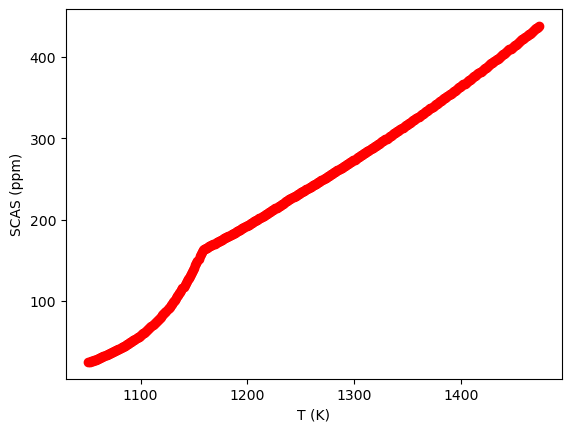

In [11]:
plt.plot(CD_2019['T_K'], CD_2019['Calc SCAS (ppm)'], 'or')
plt.ticklabel_format(useOffset=False)
plt.xlabel('T (K)')
plt.ylabel('SCAS (ppm)')